In [1]:
import pandas as pd
df = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/dataset_convertito.csv')


In [2]:
list(df.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [3]:
# Creare la nuova variabile "Esposizione ai social"
social_columns = [
    'Quanto utilizzi in media i seguenti social network? [Youtube]',
    'Quanto utilizzi in media i seguenti social network? [Facebook]',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]'
]
df['Esposizione ai social'] = df[social_columns].sum(axis=1)

In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Trasformare la variabile 'Quale marchio acquisti solitamente?' in df
df2 = df.copy()
df2['Quale marchio acquisti solitamente?'] = df['Quale marchio acquisti solitamente?'].apply(lambda x: 0 if x == 0 else 1)

# Trasformazione della variabile 'Genere:'

df2['Età:\xa0'] = df2['Età:\xa0'].apply(lambda x: 0 if x < 2 else 2)
df2['Genere:'] = df2['Genere:'].apply(lambda x: 0 if x < 2 else 2)

# Mappatura per la variabile 'Regione di residenza:\xa0' in base alla divisione geografica (Nord, Centro, Sud)
region_mapping = {
    0: 2, 1: 2, 2: 2, 3: 2,
    4: 0, 5: 0, 6: 1,
    7: 0, 8: 0, 9: 1, 10: 2,
    11: 0, 12: 2, 13: 2, 14: 2,
    15: 1, 16: 0
}

df2['Regione di residenza:\xa0'] = df2['Regione di residenza:\xa0'].map(region_mapping)

# Creazione del nuovo dataset df_cluster basato sulle colonne specificate e senza valori NaN
selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?']
df_cluster = df2[selected_columns].dropna()

In [5]:
df_cluster['Genere:'].value_counts()

Genere:
0    269
2     72
Name: count, dtype: int64

In [7]:
# Codice per la standardizzazione e l'analisi cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Supponendo che df_cluster sia il tuo DataFrame
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Aggiungere la colonna dei cluster a df_cluster
df_cluster['Cluster'] = clusters


# Calcolare le dimensioni di ogni cluster
cluster_sizes = df_cluster['Cluster'].value_counts()
print("\nDimensioni di ogni cluster:")
print(cluster_sizes)


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Dimensioni di ogni cluster:
Cluster
1    118
0     98
2     66
3     59
Name: count, dtype: int64


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

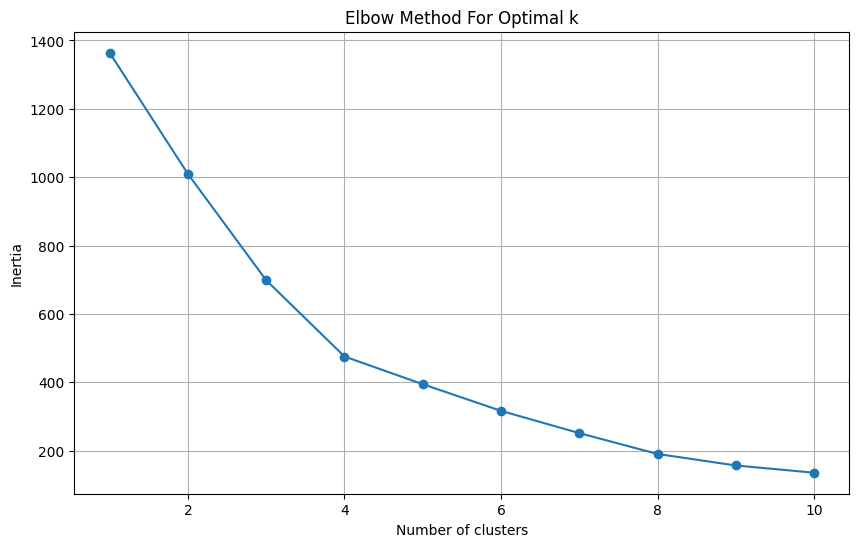

In [8]:

# Range di k da testare
k_range = range(1, 11)

# Calcolare l'inerzia per ogni valore di k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


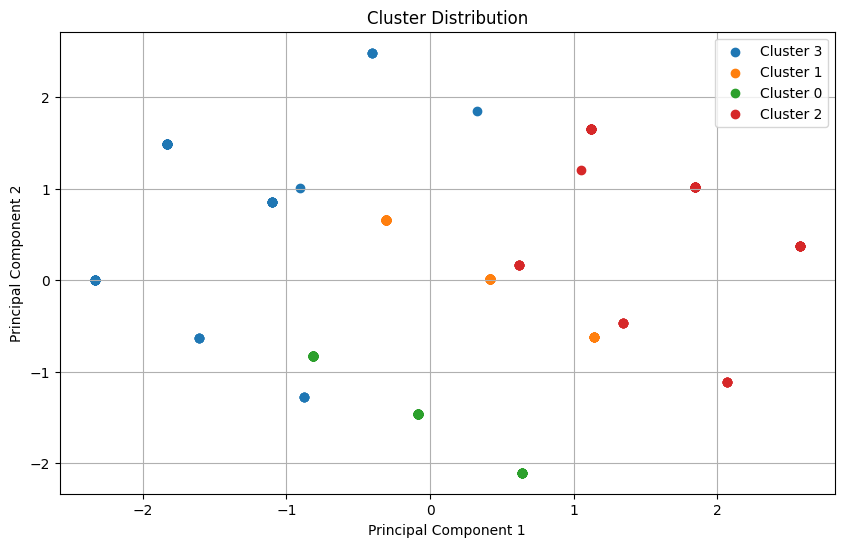

In [9]:

from sklearn.decomposition import PCA

# Creare e addestrare il modello PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creare un DataFrame per i componenti principali
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Grafico per visualizzare la distribuzione dei cluster
plt.figure(figsize=(10, 6))
for c in df_pca['Cluster'].unique():
    plt.scatter(df_pca[df_pca['Cluster'] == c]['PC1'], df_pca[df_pca['Cluster'] == c]['PC2'], label=f'Cluster {c}')
plt.title('Cluster Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [36]:
#'Quanto sei interessato alle tematiche green da 1 a 5?', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social'
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
# Mappa i valori originali a 'Ace' e 'Non Ace'
mapping = {0: "Ace", 1:"Altro"}
df_cluster['Quale marchio acquisti solitamente?'] = df_cluster['Quale marchio acquisti solitamente?'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Quale marchio acquisti solitamente?']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Marchio", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()


KeyError: 'Quale marchio acquisti solitamente?'

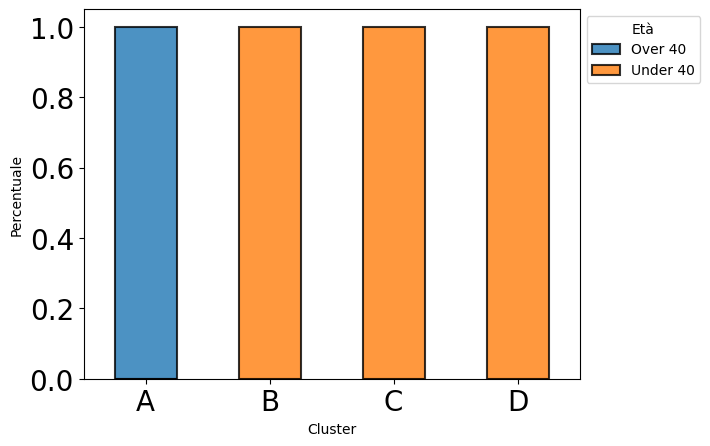

In [11]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Under 40", 2: "Over 40"}
df_cluster['Età:\xa0'] = df_cluster['Età:\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Età:\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Età", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()


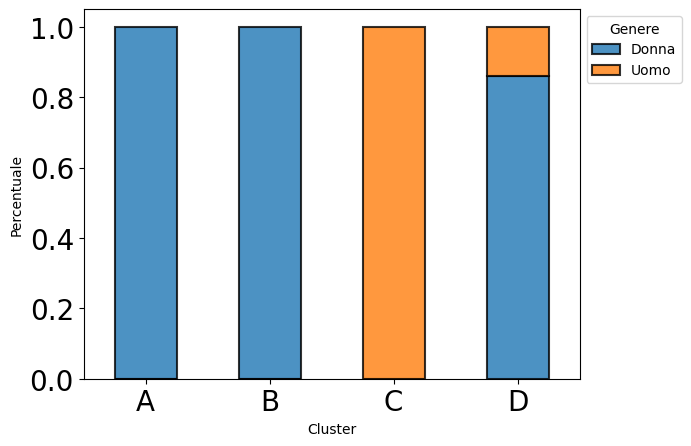

In [12]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Donna", 2: "Uomo"}
df_cluster['Genere:'] = df_cluster['Genere:'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Genere:']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Genere", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()

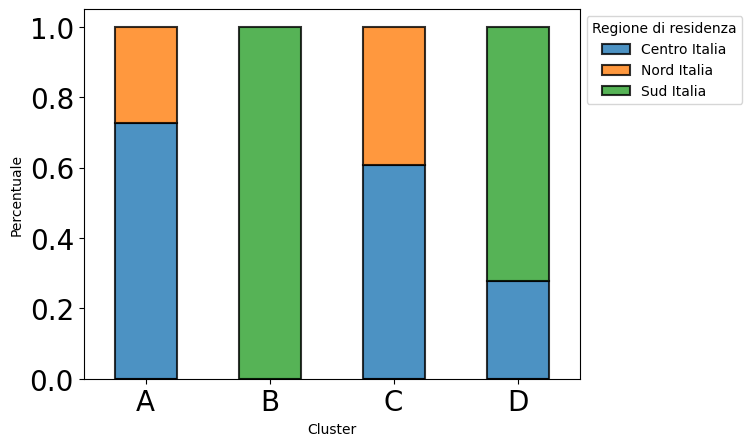

In [13]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Nord Italia", 1:"Centro Italia", 2: "Sud Italia"}
df_cluster['Regione di residenza:\xa0'] = df_cluster['Regione di residenza:\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Regione di residenza:\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Regione di residenza", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()

    CLUSTER MUSICA

In [14]:
import pandas as pd
df = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/dataset_convertito.csv')

In [15]:
# Creare la nuova variabile "Esposizione ai social"
social_columns = [
    'Quanto utilizzi in media i seguenti social network? [Youtube]',
    'Quanto utilizzi in media i seguenti social network? [Facebook]',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]'
]
df['Esposizione ai social'] = df[social_columns].sum(axis=1)

list(df.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [16]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Trasformare la variabile 'Quale marchio acquisti solitamente?' in df
df2 = df.copy()

df2['Esposizione ai social'] = df['Esposizione ai social'].apply(lambda x: 0 if x < 4 else 1)
df2['Quale marchio acquisti solitamente?'] = df['Quale marchio acquisti solitamente?'].apply(lambda x: 0 if x == 0 else 1)
df2['Età:\xa0'] = df2['Età:\xa0'].apply(lambda x: 0 if x < 2 else 2)
df2['Genere:'] = df2['Genere:'].apply(lambda x: 0 if x < 2 else 2)
df2['Regione di residenza:\xa0'] = df2['Regione di residenza:\xa0'].map(region_mapping)
df2['Quando pulisci cosa metti in sottofondo?\xa0'] = df2['Quando pulisci cosa metti in sottofondo?\xa0'].apply(lambda x: 0 if x == 1 or x == 2 else 1)

# Mappatura per la variabile 'Regione di residenza:\xa0' in base alla divisione geografica (Nord, Centro, Sud)
region_mapping = {
    0: 2, 1: 2, 2: 2, 3: 2,
    4: 0, 5: 0, 6: 1,
    7: 0, 8: 0, 9: 1, 10: 2,
    11: 0, 12: 2, 13: 2, 14: 2,
    15: 1, 16: 0
}

# Creazione del nuovo dataset df_cluster basato sulle colonne specificate e senza valori NaN
selected_columns = ['Quale marchio acquisti solitamente?', 'Età:\xa0', 'Esposizione ai social', 'Quando pulisci cosa metti in sottofondo?\xa0']
df_cluster = df2[selected_columns].dropna()

In [17]:
df_cluster['Esposizione ai social'].value_counts()

Esposizione ai social
1    286
0    214
Name: count, dtype: int64

In [18]:
# Codice per la standardizzazione e l'analisi cluster
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Aggiungere la colonna dei cluster a df_cluster
df_cluster['Cluster'] = clusters

# Visualizzare i risultati
df_cluster.head()

# Calcolare le dimensioni di ogni cluster
cluster_sizes = df_cluster['Cluster'].value_counts()
print("\nDimensioni di ogni cluster:")
print(cluster_sizes)


Dimensioni di ogni cluster:
Cluster
2    167
1    148
3    102
0     83
Name: count, dtype: int64


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


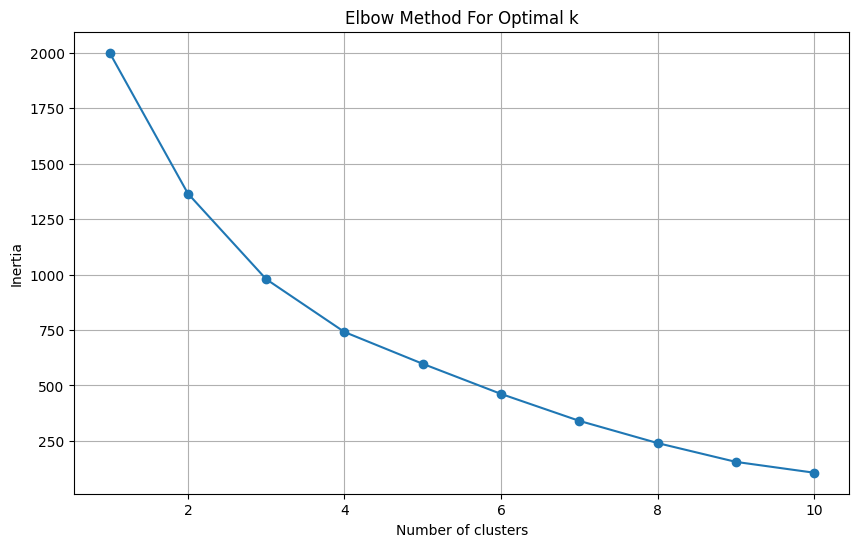

In [19]:
# Range di k da testare
k_range = range(1, 11)

# Calcolare l'inerzia per ogni valore di k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

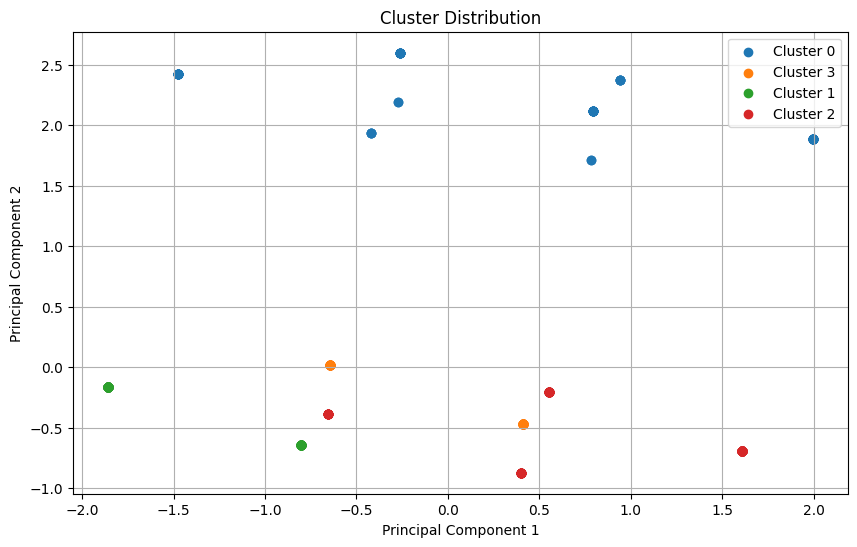

In [20]:
from sklearn.decomposition import PCA

# Creare e addestrare il modello PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creare un DataFrame per i componenti principali
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Grafico per visualizzare la distribuzione dei cluster
plt.figure(figsize=(10, 6))
for c in df_pca['Cluster'].unique():
    plt.scatter(df_pca[df_pca['Cluster'] == c]['PC1'], df_pca[df_pca['Cluster'] == c]['PC2'], label=f'Cluster {c}')
plt.title('Cluster Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

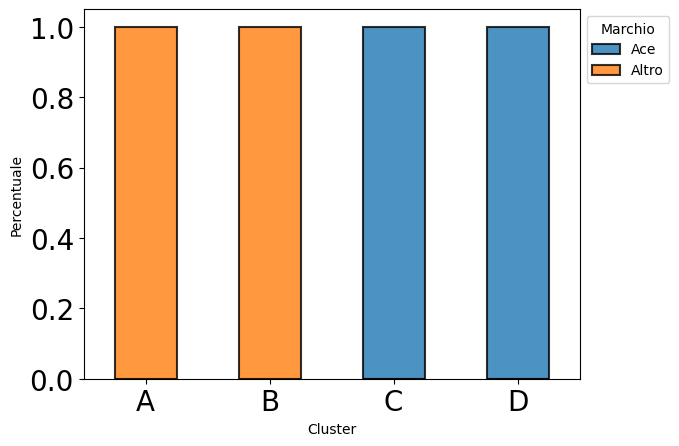

In [21]:
#'Quanto sei interessato alle tematiche green da 1 a 5?', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social'
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
# Mappa i valori originali a 'Ace' e 'Non Ace'
mapping = {0: "Ace", 1:"Altro"}
df_cluster['Quale marchio acquisti solitamente?'] = df_cluster['Quale marchio acquisti solitamente?'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Quale marchio acquisti solitamente?']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Marchio", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()



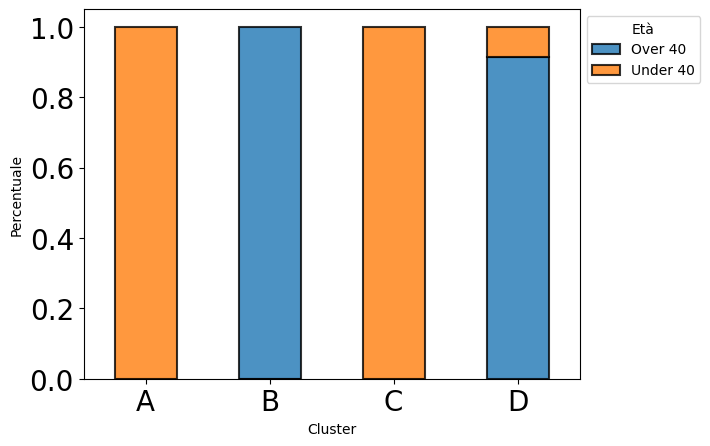

In [22]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Under 40", 2: "Over 40"}
df_cluster['Età:\xa0'] = df_cluster['Età:\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Età:\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Età", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()



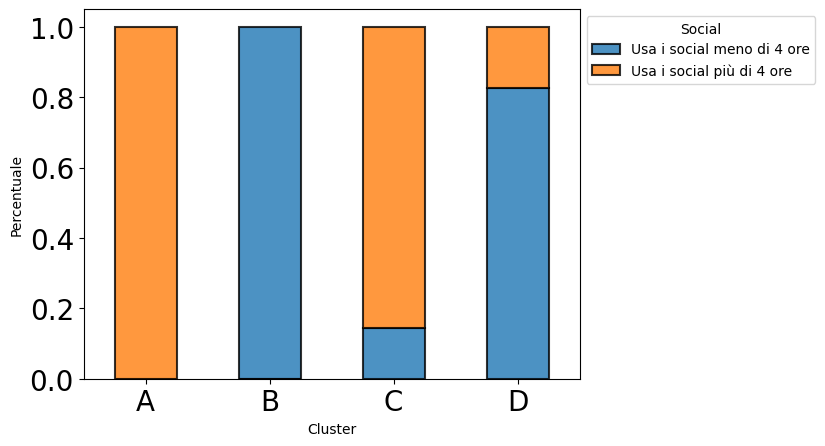

In [23]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Usa i social meno di 4 ore", 1: "Usa i social più di 4 ore"}
df_cluster['Esposizione ai social'] = df_cluster['Esposizione ai social'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Esposizione ai social']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Social", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()


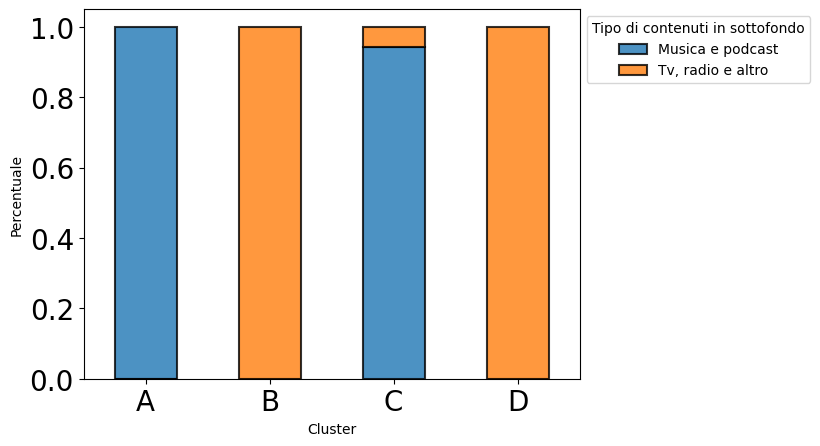

In [24]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Musica e podcast", 1:"Tv, radio e altro"}
df_cluster['Quando pulisci cosa metti in sottofondo?\xa0'] = df_cluster['Quando pulisci cosa metti in sottofondo?\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Quando pulisci cosa metti in sottofondo?\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Tipo di contenuti in sottofondo", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()

    CLUSTER GREEN

In [25]:
import pandas as pd
df = pd.read_csv('/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi questionario/dataset_convertito.csv')


In [26]:
# Creare la nuova variabile "Esposizione ai social"
social_columns = [
    'Quanto utilizzi in media i seguenti social network? [Youtube]',
    'Quanto utilizzi in media i seguenti social network? [Facebook]',
    'Quanto utilizzi in media i seguenti social network? [Instagram ]',
    'Quanto utilizzi in media i seguenti social network? [Tiktok]'
]
df['Esposizione ai social'] = df[social_columns].sum(axis=1)

list(df.columns)

['ID risposta',
 'Ultima pagina',
 'Quali di questi dispositivi utilizzi di più?\xa0  [TV]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Radio]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Computer]',
 'Quali di questi dispositivi utilizzi di più?\xa0  [Smartphone ]',
 'Quante ore al giorno guardi la TV?',
 'Quante ore al giorno ascolti la radio?',
 'Quanto utilizzi in media i seguenti social network? [Youtube]',
 'Quanto utilizzi in media i seguenti social network? [Facebook]',
 'Quanto utilizzi in media i seguenti social network? [Instagram ]',
 'Quanto utilizzi in media i seguenti social network? [Tiktok]',
 'Ti sono mai capitati sui social contenuti legati alla pulizia? (Video tutorial, asmr, pubblicità ecc.)',
 'Se sì, che tipologie di contenuto? [Spot pubblicitari]',
 'Se sì, che tipologie di contenuto? [Video brevi di gente che pulisce (ASMR)]',
 'Se sì, che tipologie di contenuto? [Tutorial pulizia (video con spiegazioni o consigli sulla pulizia)]',
 'Se sì, 

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# Trasformare la variabile 'Quale marchio acquisti solitamente?' in df
df2 = df.copy()

df2['Esposizione ai social'] = df['Esposizione ai social'].apply(lambda x: 0 if x < 4 else 1)
df2['Quale marchio acquisti solitamente?'] = df['Quale marchio acquisti solitamente?'].apply(lambda x: 0 if x == 0 else 1)
df2['Età:\xa0'] = df2['Età:\xa0'].apply(lambda x: 0 if x < 2 else 2)
df2['Quanto sei interessato alle tematiche green da 1 a 5?'] = df2['Quanto sei interessato alle tematiche green da 1 a 5?'].apply(lambda x: 0 if x < 4 else 1)
df2['Quando pulisci cosa metti in sottofondo?\xa0'] = df2['Quando pulisci cosa metti in sottofondo?\xa0'].apply(lambda x: 0 if x == 1 or x == 2 else 1)
df2['Genere:'] = df2['Genere:'].apply(lambda x: 0 if x < 2 else 2)
df2['Saresti disposto a comprare un prodotto green?'] = df2['Saresti disposto a comprare un prodotto green?'].apply(lambda x: 0 if x < 3 else 1)


# Mappatura per la variabile 'Regione di residenza:\xa0' in base alla divisione geografica (Nord, Centro, Sud)
region_mapping = {
    0: 2, 1: 2, 2: 2, 3: 2,
    4: 1, 5: 1, 6: 1,
    7: 1, 8: 1, 9: 1, 10: 2,
    11: 1, 12: 2, 13: 2, 14: 2,
    15: 1, 16: 1
}

df2['Regione di residenza:\xa0'] = df2['Regione di residenza:\xa0'].map(region_mapping)

# Creazione del nuovo dataset df_cluster basato sulle colonne specificate e senza valori NaN
selected_columns = ['Regione di residenza:\xa0', 'Età:\xa0', 'Quanto sei interessato alle tematiche green da 1 a 5?', 'Saresti disposto a comprare un prodotto green?']
df_cluster = df2[selected_columns].dropna()


In [28]:
df_cluster['Regione di residenza:\xa0'].value_counts()

Regione di residenza: 
1.0    177
2.0    164
Name: count, dtype: int64

In [29]:
# Codice per la standardizzazione e l'analisi cluster
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Aggiungere la colonna dei cluster a df_cluster
df_cluster['Cluster'] = clusters

# Visualizzare i risultati
df_cluster.head()

# Calcolare le dimensioni di ogni cluster
cluster_sizes = df_cluster['Cluster'].value_counts()
print("\nDimensioni di ogni cluster:")
print(cluster_sizes)

/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Dimensioni di ogni cluster:
Cluster
1    123
2     74
3     72
0     72
Name: count, dtype: int64


/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/peppus00/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default valu

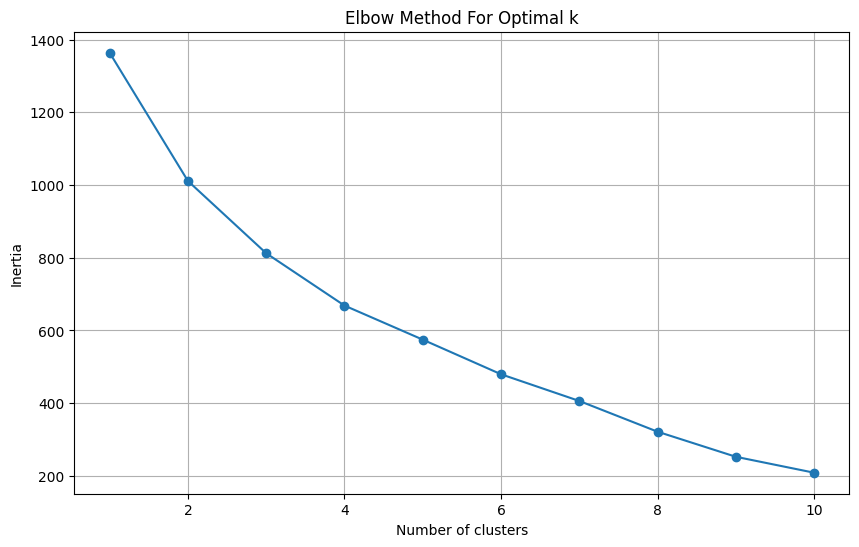

In [30]:

# Range di k da testare
k_range = range(1, 11)

# Calcolare l'inerzia per ogni valore di k
inertia = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Creare il grafico
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


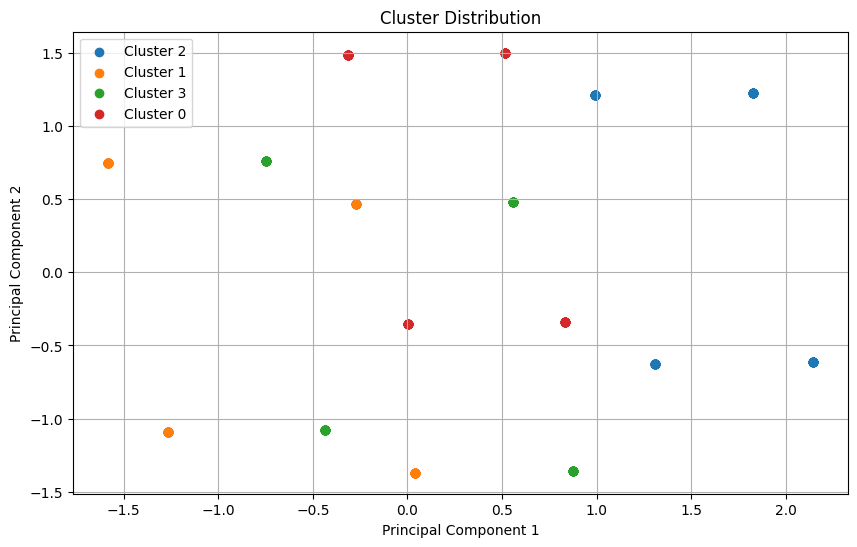

In [31]:
from sklearn.decomposition import PCA

# Creare e addestrare il modello PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Creare un DataFrame per i componenti principali
df_pca = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
df_pca['Cluster'] = clusters

# Grafico per visualizzare la distribuzione dei cluster
plt.figure(figsize=(10, 6))
for c in df_pca['Cluster'].unique():
    plt.scatter(df_pca[df_pca['Cluster'] == c]['PC1'], df_pca[df_pca['Cluster'] == c]['PC2'], label=f'Cluster {c}')
plt.title('Cluster Distribution')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


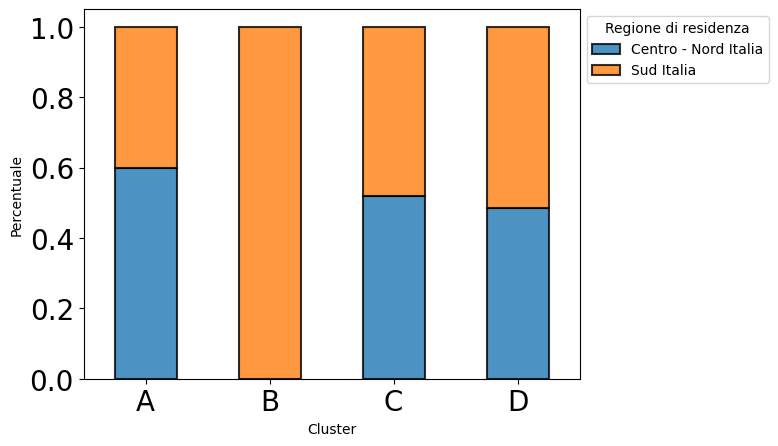

In [32]:
#selected_columns = ['Regione di residenza:\xa0', 'Età:\xa0', 'Quanto sei interessato alle tematiche green da 1 a 5?', 'Saresti disposto a comprare un prodotto green?']
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
# Mappa i valori originali a 'Ace' e 'Non Ace'
mapping = {0: "Nord Italia", 1:"Centro - Nord Italia", 2:"Sud Italia"}
df_cluster['Regione di residenza:\xa0'] = df_cluster['Regione di residenza:\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Regione di residenza:\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)

# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Regione di residenza", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()

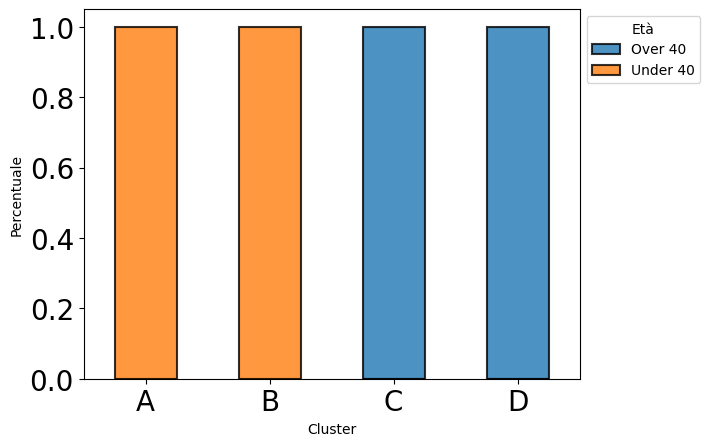

In [33]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Under 40", 2: "Over 40"}
df_cluster['Età:\xa0'] = df_cluster['Età:\xa0'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Età:\xa0']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Età", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()

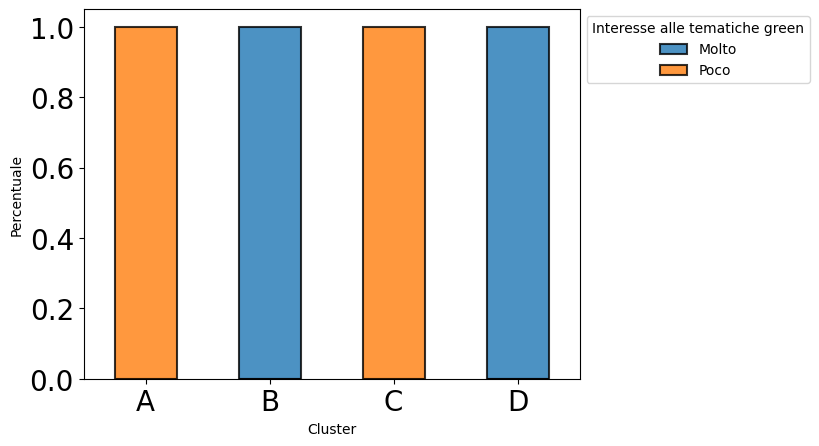

In [34]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Poco", 1: "Molto"}
df_cluster['Quanto sei interessato alle tematiche green da 1 a 5?'] = df_cluster['Quanto sei interessato alle tematiche green da 1 a 5?'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Quanto sei interessato alle tematiche green da 1 a 5?']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Interesse alle tematiche green", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()



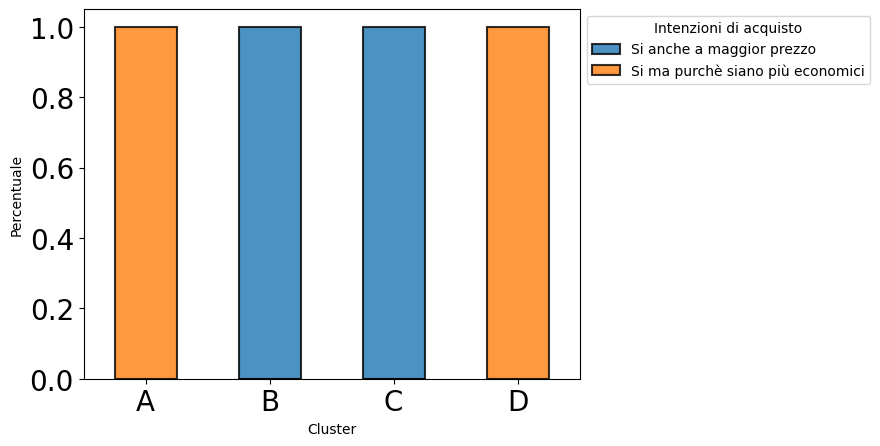

In [35]:
import matplotlib.pyplot as plt

# Assegna le etichette ai cluster
df_cluster['kmeans_labels'] = kmeans.labels_
mapping = {0: "Si anche a maggior prezzo", 1:"Si ma purchè siano più economici"}
df_cluster['Saresti disposto a comprare un prodotto green?'] = df_cluster['Saresti disposto a comprare un prodotto green?'].map(mapping)
df_cluster['kmeans_labels'] = df_cluster['kmeans_labels'].map({0: "A", 1: "B", 2: "C", 3:"D"})
clust_name = ['A', 'B', 'C', 'D']

# Raggruppa le ricariche per etichette di cluster e normalizza i valori
bar_pl = df_cluster.groupby(['kmeans_labels', 'Saresti disposto a comprare un prodotto green?']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
#selected_columns = ['Genere:', 'Regione di residenza:\xa0', 'Età:\xa0', 'Quale marchio acquisti solitamente?', 'Esposizione ai social']
# Crea il grafico a barre
bar_pl.plot(kind='bar', stacked=True, alpha=0.8, edgecolor='black', linewidth=1.5)

# Impostazioni per l'asse x, l'asse y, la legenda e l'etichetta
plt.xticks(range(0, len(clust_name)), clust_name, fontsize=20, rotation=0)
plt.yticks(fontsize=20)
plt.legend(title="Intenzioni di acquisto", bbox_to_anchor=(1, 1))
plt.xlabel("Cluster")
plt.ylabel("Percentuale")
plt.show()